# ANALYSE EXPLORATOIRE DES META DONNEES SUR LES IMAGES DU DATASET 

![ANALYSE EXPLORATOIRE](https://fastercapital.com/fr/i-fr/Prediction-des-defauts-de-paiement---comment-utiliser-l-apprentissage-automatique-pour-predire-les-defauts-de-paiement--Analyse-exploratoire-des-donnees---EDA--.webp)

## Importation des librairies

In [52]:
# cd "C:\Users\donfa\OneDrive\Desktop\PROJET MACHINE LEARNING\skin-cancer-prediction-bcc"

In [53]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization

from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.applications import DenseNet121


from sklearn.metrics import classification_report, confusion_matrix

In [54]:
%matplotlib inline

## Chargement et aperçu des données

In [55]:
file_path = "data/raw/HAM10000_metadata.csv"
data = pd.read_csv(file_path)

# Aperçu des premières lignes
print("Aperçu des premières lignes du dataset :")
display(data.head())

# Infos générales sur le dataset
print("\nInformations sur les colonnes :")
data.info()

Aperçu des premières lignes du dataset :


,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear



Informations sur les colonnes :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


#### Globalement, le dataset est composé de 7 colonnes et 10015 lignes. il n'y a pas de valeurs manquantes sauf dans l'age des patients.

## Statistiques descriptives

In [56]:
print("\nRésumé statistique des colonnes numériques :")
display(data.describe())


Résumé statistique des colonnes numériques :


,age
count,9958.000000
mean,51.863828
std,16.968614
min,0.000000
25%,40.000000
50%,50.000000
75%,65.000000
max,85.000000


#### Les patients ont en moyenne 51 ans, avec un écart-type de 16 ans. L'âge minimum est de 0 an et l'âge maximum est de 85 ans. Il s'agit donc d'un dataset de personnes adultes en majorité

In [57]:
# Comptage des valeurs manquantes
print("\nValeurs manquantes dans chaque colonne :")
missing_values = data.isnull().sum()
display(missing_values)


Valeurs manquantes dans chaque colonne :


lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64

#### Il y a 57 valeurs manquantes dans la colonne "age". Nous allons les remplacer par la moyenne des apres observations âges.

In [58]:
# Afficher les lignes où 'age' est nul
lignes_null_age = data[data['age'].isnull()]
print("Lignes avec des valeurs nulles dans la colonne 'age':")
display(lignes_null_age)

Lignes avec des valeurs nulles dans la colonne 'age':


,lesion_id,image_id,dx,dx_type,age,sex,localization
968,HAM_0001186,ISIC_0033391,bkl,consensus,NaN,unknown,unknown
969,HAM_0002660,ISIC_0033750,bkl,consensus,NaN,unknown,unknown
970,HAM_0000372,ISIC_0033685,bkl,consensus,NaN,unknown,unknown
971,HAM_0000948,ISIC_0033631,bkl,consensus,NaN,unknown,unknown
972,HAM_0000983,ISIC_0033490,bkl,consensus,NaN,unknown,unknown
973,HAM_0007281,ISIC_0034283,bkl,consensus,NaN,unknown,unknown
974,HAM_0001561,ISIC_0032740,bkl,consensus,NaN,unknown,unknown
975,HAM_0000825,ISIC_0034186,bkl,consensus,NaN,unknown,unknown
977,HAM_0006074,ISIC_0034252,bkl,consensus,NaN,unknown,unknown
978,HAM_0006074,ISIC_0033829,bkl,consensus,NaN,unknown,unknown


In [59]:
# Calculer la moyenne des âges (en ignorant les valeurs nulles)
moyenne_age = data['age'].mean()

print(f"Moyenne d'age : {moyenne_age}")

# Remplacer les valeurs nulles par la moyenne
data['age'] = data['age'].fillna(moyenne_age)
# Verification
print("\nValeurs manquantes après imputation :")
missing_values_after = data.isnull().sum()
display(missing_values_after)

Moyenne d'age : 51.863828077927295

Valeurs manquantes après imputation :


lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

## Distribution des sexes 

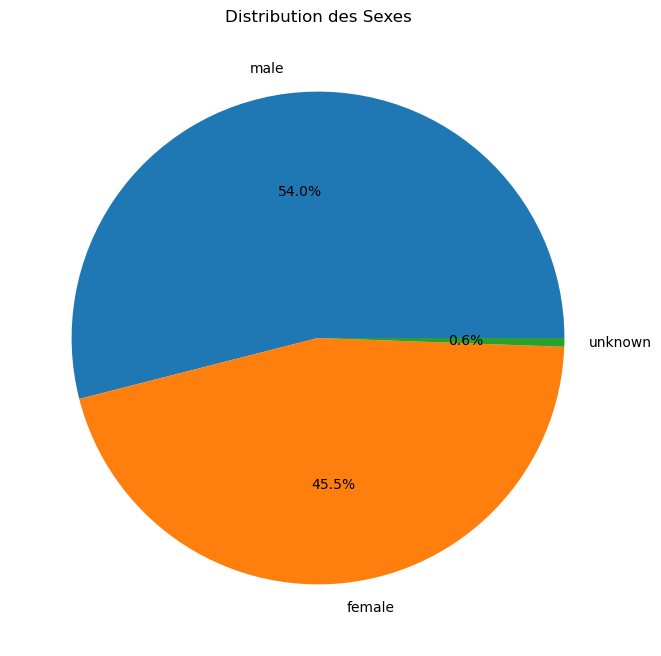

In [69]:
plt.figure(figsize=(8, 8))
plt.pie(data['sex'].value_counts().values , labels=data['sex'].value_counts().index ,autopct='%1.1f%%')
plt.title('Distribution des Sexes')  
plt.show()

#### Les femmes représentent 45.5% des patients et les hommes 54%. le dataset contenait plus d'hommes que de femmes. , bien que la différence ne soit pas très significative. nous pouvons donc dire que le dataset est équilibré en termes de sexe.

In [60]:
# Distribution des diagnostics (dx)
print("\nDistribution des types de diagnostic (dx) :")
dx_counts = data['dx'].value_counts()
display(dx_counts)


Distribution des types de diagnostic (dx) :


dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64

#### Les diagnostics sont répartis comme suit : 
#### - Melanocytic nevi : 6705
#### - Melanoma : 1113
#### - Benign keratosis-like lesions : 1099
#### - Basal cell carcinoma : 514
#### - Actinic keratoses : 327
#### - Vascular lesions : 142
#### - Dermatofibroma : 115

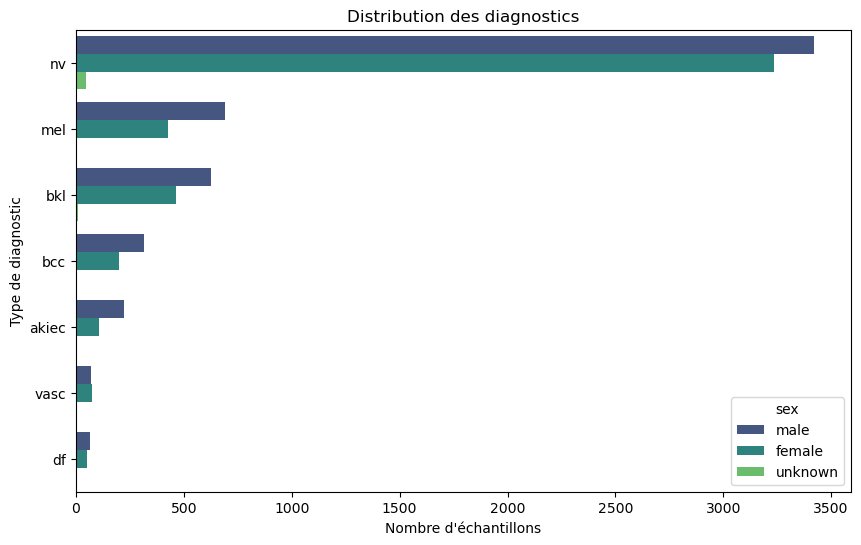

In [68]:
# Graphique de distribution des diagnostics
plt.figure(figsize=(10, 6))
sns.countplot(y='dx', data=data, order=data['dx'].value_counts().index, hue='sex', palette="viridis", legend=True)
plt.title("Distribution des diagnostics")
plt.xlabel("Nombre d'échantillons")
plt.ylabel("Type de diagnostic")
plt.show()

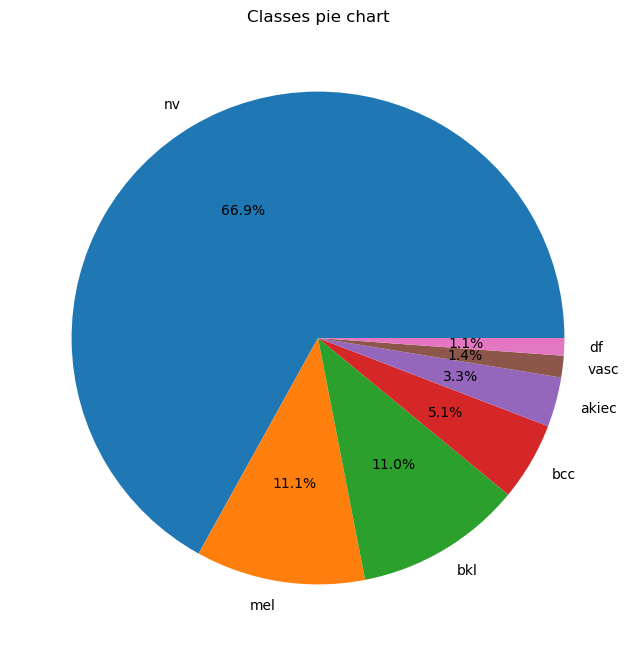

In [67]:
plt.figure(figsize=(8, 8))
plt.pie(data['dx'].value_counts().values , labels=data['dx'].value_counts().index ,autopct='%1.1f%%')
plt.title('Classes pie chart')  
plt.show()

#### La classe majoritaire est "Melanocytic nevi" avec 6705 échantillons, suivi de "Melanoma" avec 1113 échantillons. Les autres classes ont moins d'échantillons. 
#### Cependant la classe bcc qui est celle qui nous interresse le plus possede environ 500 echantillons ce qui est acceptable.

# Distribution de l'âge (générale)


Distribution de l'âge (générale) :


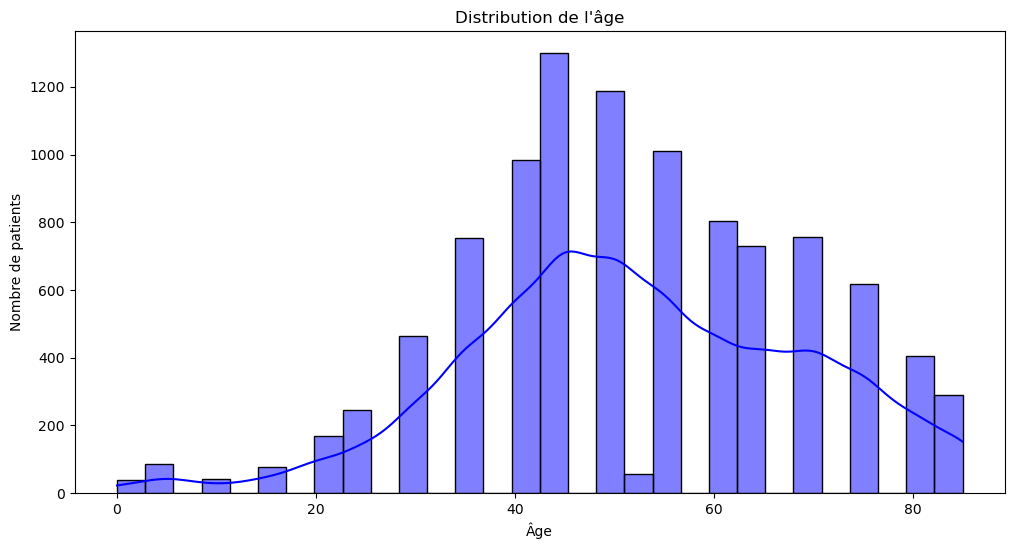

In [70]:
# Distribution de l'âge (générale)
print("\nDistribution de l'âge (générale) :")
plt.figure(figsize=(12, 6))
sns.histplot(data['age'].dropna(), kde=True, color='blue', bins=30)
plt.title("Distribution de l'âge")
plt.xlabel("Âge")
plt.ylabel("Nombre de patients")
plt.show()

#### La plupart des patients ont entre 40 et 60 ans. Les patients de moins de 20 ans sont très peu nombreux.


Distribution de l'âge par diagnostic :


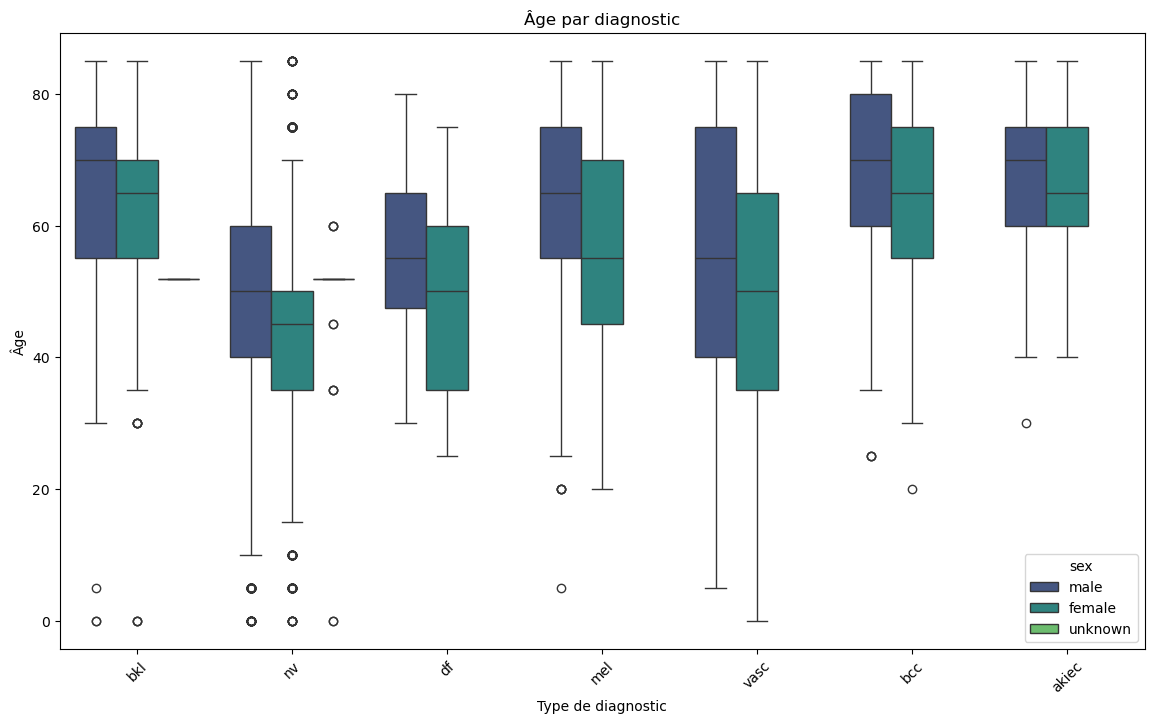

In [72]:
# Distribution de l'âge par diagnostic (dx)
print("\nDistribution de l'âge par diagnostic :")
plt.figure(figsize=(14, 8))
sns.boxplot(data=data, x='dx', y='age', palette='viridis', hue='sex',legend=True)
plt.title("Âge par diagnostic")
plt.xlabel("Type de diagnostic")
plt.ylabel("Âge")
plt.xticks(rotation=45)
plt.show()

## Distribution de l'âge par diagnostic (dx)

Ce graphique en boîte à moustaches (boxplot) présente la distribution de l'âge des patients en fonction de leur diagnostic de cancer de la peau, stratifiée par sexe (homme, femme, inconnu). Chaque boîte représente un type de diagnostic (dx), et les couleurs à l'intérieur de chaque boîte distinguent les sexes.

**Interprétation générale :**

*   **Boîtes :** Elles délimitent l'intervalle interquartile (IQR), contenant 50% des données. La ligne horizontale à l'intérieur de chaque boîte indique la médiane de l'âge.
*   **Moustaches :** Elles s'étendent depuis les boîtes jusqu'aux valeurs les plus éloignées qui ne sont pas considérées comme des valeurs aberrantes (outliers).
*   **Points isolés (outliers) :** Les points en dehors des moustaches représentent les valeurs aberrantes, c'est-à-dire les âges exceptionnellement bas ou élevés.

**Analyse par diagnostic :**

*   **bkl (lésions bénignes de type kératose) :**
    *   Distribution d'âge relativement large.
    *   Médiane d'âge plus élevée que pour 'nv' et 'df'.
    *   Présence de plusieurs outliers jeunes.
    *   Légère différence entre les sexes, les hommes ayant une médiane légèrement supérieure.
*   **nv (naevus mélanocytaires - grains de beauté) :**
    *   Distribution d'âge plus concentrée, IQR plus petit.
    *   Médiane d'âge plus basse que les autres diagnostics, suggérant que les grains de beauté sont plus fréquents chez les jeunes.
    *   Présence d'outliers jeunes et moins d'outliers âgés.
    *   Peu de différence visible entre les sexes.
*   **df (dermatofibrome) :**
    *   Distribution d'âge assez similaire à 'nv', mais avec une médiane légèrement plus élevée.
    *   Peu d'outliers.
    *   Différence entre les sexes plus marquée que pour 'nv', les femmes ayant une médiane plus basse.
*   **mel (mélanome) :**
    *   Distribution d'âge étendue, comparable à 'bkl'.
    *   Médiane d'âge élevée, suggérant que le mélanome touche des personnes plus âgées en moyenne.
    *   Présence d'outliers des deux côtés (jeunes et âgés).
    *   Différence entre les sexes moins prononcée que pour 'df'.
*   **vasc (lésions vasculaires) :**
    *   Distribution d'âge très étendue, avec un IQR important.
    *   Présence d'outliers très jeunes, indiquant que certaines lésions vasculaires peuvent être congénitales ou apparaître très tôt dans la vie.
    *   Différence entre les sexes peu marquée.
*   **bcc (carcinome basocellulaire) :**
    *   Distribution d'âge étendue, avec une médiane élevée, comparable à 'mel'.
    *   Présence d'outliers des deux côtés, mais moins extrêmes que pour 'vasc'.
    *   Légère différence entre les sexes, les hommes ayant une médiane légèrement supérieure. **C'est un point important, le BCC touche majoritairement des personnes âgées.**
*   **akiec (kératose actinique) :**
    *   Distribution d'âge globalement élevée, avec une médiane similaire à 'bcc' et 'mel'.
    *   Relativement peu d'outliers.
    *   Légère différence entre les sexes, les hommes semblant avoir une médiane un peu plus élevée. **Comme le BCC, l'akiec touche principalement des personnes âgées.**

**Comparaisons importantes :**

*   **Âge et malignité :** Les diagnostics considérés comme plus graves (mélanome, carcinome basocellulaire) ont tendance à toucher des populations plus âgées.
*   **Différences entre les sexes :** Bien que des différences existent, elles ne sont pas extrêmement prononcées pour la plupart des diagnostics. 'df' montre une différence plus notable, avec des femmes touchées à un âge moyen plus jeune.
*   **Valeurs aberrantes :** La présence d'outliers, en particulier chez les jeunes pour 'bkl' et 'vasc', indique des cas exceptionnels qui pourraient mériter une investigation plus approfondie.

**En résumé :**

Ce graphique révèle des tendances claires dans la distribution de l'âge en fonction du type de diagnostic de cancer de la peau. Les cancers plus graves, comme le mélanome et le carcinome basocellulaire, ont tendance à être diagnostiqués chez des personnes plus âgées. Des différences entre les sexes existent, mais elles sont généralement subtiles. La présence d'outliers suggère la nécessité d'examiner des cas individuels pour comprendre les facteurs spécifiques qui pourraient influencer l'âge d'apparition de la maladie.


### Distribution de l'âge par sexe


Distribution de l'âge par sexe :


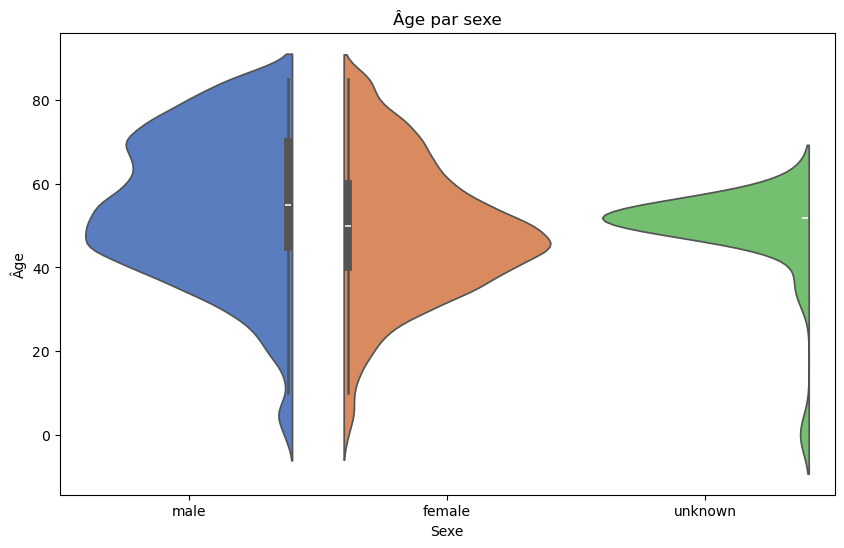

In [73]:
# Distribution de l'âge par sexe
print("\nDistribution de l'âge par sexe :")
plt.figure(figsize=(10, 6))
sns.violinplot(data=data, x='sex', y='age', hue='sex', split=True, palette='muted')
plt.title("Âge par sexe")
plt.xlabel("Sexe")
plt.ylabel("Âge")
plt.show()

#### La distribution de l'âge est assez similaire pour les deux sexes

### Distribution des localisations des lésions par diagnostique


Répartition des localisations anatomiques par diagnostic :


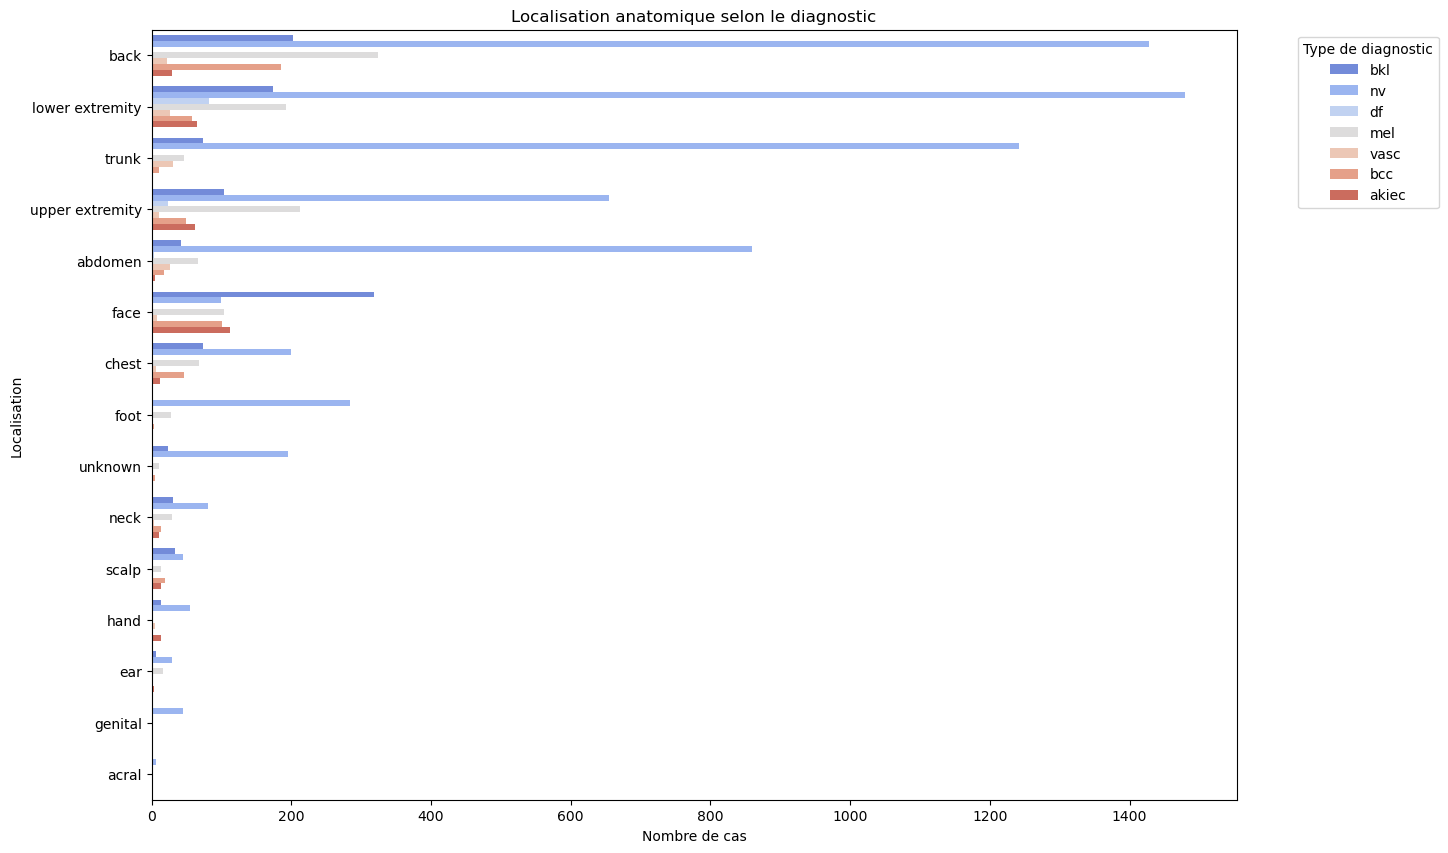

In [74]:
# Répartition des localisations anatomiques par diagnostic
print("\nRépartition des localisations anatomiques par diagnostic :")
plt.figure(figsize=(14, 10))
sns.countplot(data=data, y='localization', hue='dx', palette='coolwarm', order=data['localization'].value_counts().index)
plt.title("Localisation anatomique selon le diagnostic")
plt.xlabel("Nombre de cas")
plt.ylabel("Localisation")
plt.legend(title="Type de diagnostic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Les parties du corps comme le dos, les jambes, les bras et le torse sont les plus touchées par les lésions de la peau.

### ZOOM SUR LE TYPE DE CANCER QUI NOUS INTERESSE LE PLUS : BCC

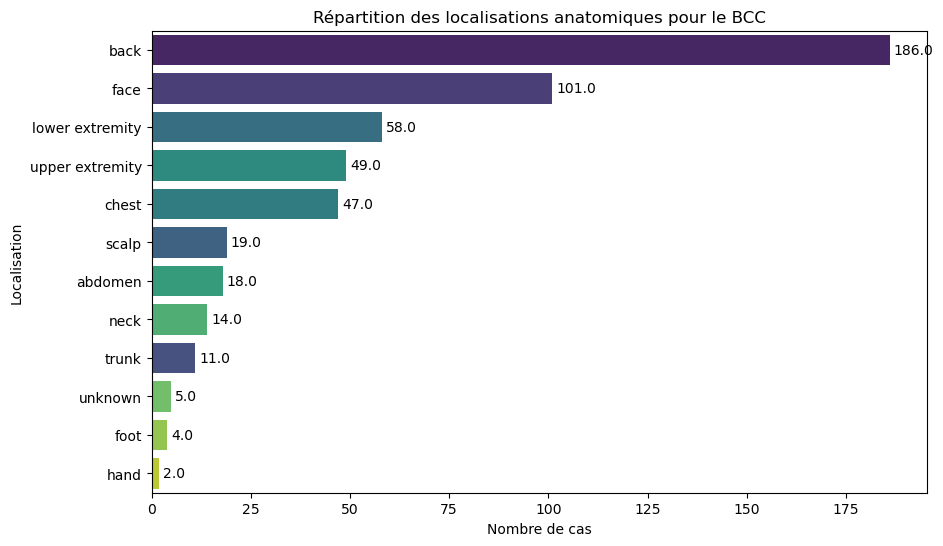


Tableau des valeurs pour le BCC
localization
back               186
face               101
lower extremity     58
upper extremity     49
chest               47
scalp               19
abdomen             18
neck                14
trunk               11
unknown              5
foot                 4
hand                 2
Name: count, dtype: int64


In [76]:
# Filtrer les données pour ne garder que les cas de BCC
bcc_data = data[data['dx'] == 'bcc']

# Compter les occurrences de chaque localisation
localization_counts = bcc_data['localization'].value_counts()

# Créer le graphique
plt.figure(figsize=(10, 6))  # Ajuster la taille si nécessaire
ax = sns.countplot(y='localization', data=bcc_data, order=localization_counts.index, palette='viridis' , hue='localization')

# Ajouter les valeurs sur les barres
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height() / 2, f'{width}', va='center') #ajuster le +1 pour l'espacement du texte

plt.title("Répartition des localisations anatomiques pour le BCC")
plt.xlabel("Nombre de cas")
plt.ylabel("Localisation")
plt.show()

#Afficher les valeurs sous forme de tableau
print("\nTableau des valeurs pour le BCC")
print(localization_counts)

#### Le dos est la localisation la plus touchée avec 186 cas.
#### Le visage arrive en deuxième position avec 101 cas.
#### Les membres inférieurs (58 cas) et supérieurs (49 cas) sont également des localisations fréquentes, ce qui est cohérent avec l'exposition solaire.
#### Le thorax (47 cas) est aussi une zone relativement touchée.

LA ZONE PHOTOGRAPHIEE EST DONC D'UNE IMPORTANCE CAPITALE POUR LE DIAGNOSTIC DU BCC

### Exploration spécifique pour BCC (Carcinome Basocellulaire)


Distribution de l'âge pour les cas BCC :


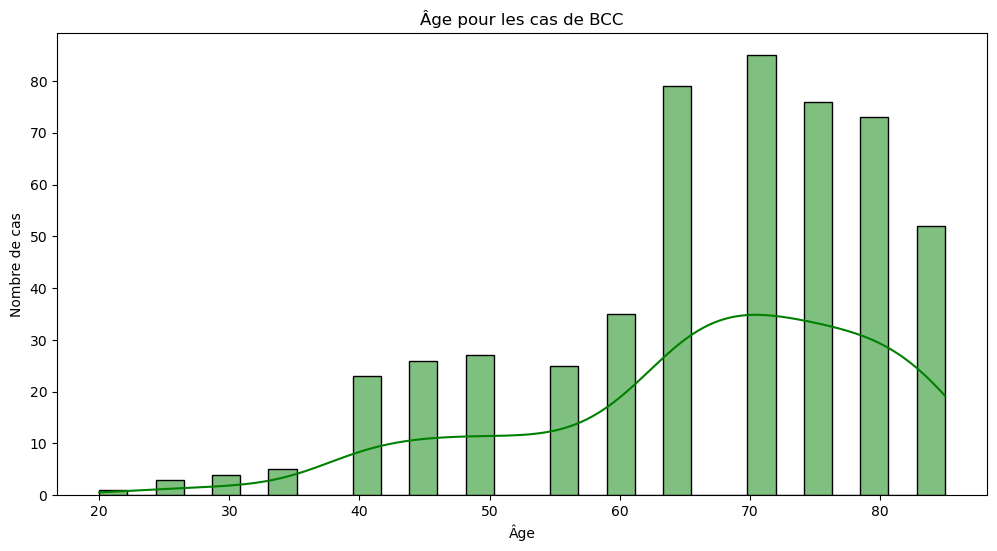

In [77]:
# Exploration spécifique pour BCC (Carcinome Basocellulaire)
bcc_data = data[data['dx'] == 'bcc']
print("\nDistribution de l'âge pour les cas BCC :")
plt.figure(figsize=(12, 6))
sns.histplot(bcc_data['age'].dropna(), kde=True, bins=30, color='green')
plt.title("Âge pour les cas de BCC")
plt.xlabel("Âge")
plt.ylabel("Nombre de cas")
plt.show()

#### La distribution de l'âge pour les cas de BCC est assez similaire à celle de l'ensemble du dataset, avec une concentration entre 40 et 70 ans.

### Répartition des diagnostics par méthode de confirmation (dx_type)
pour nous permettre de voir si le le cancer que nous voulons predire ne depends pas fortement d'un conscencus d'experts ou d'une autre methode de confirmation , car il vaudrait meiux pour nous que les diagnostics soient confirmés par des methodes plus visuelles.


Répartition des diagnostics par méthode de confirmation :


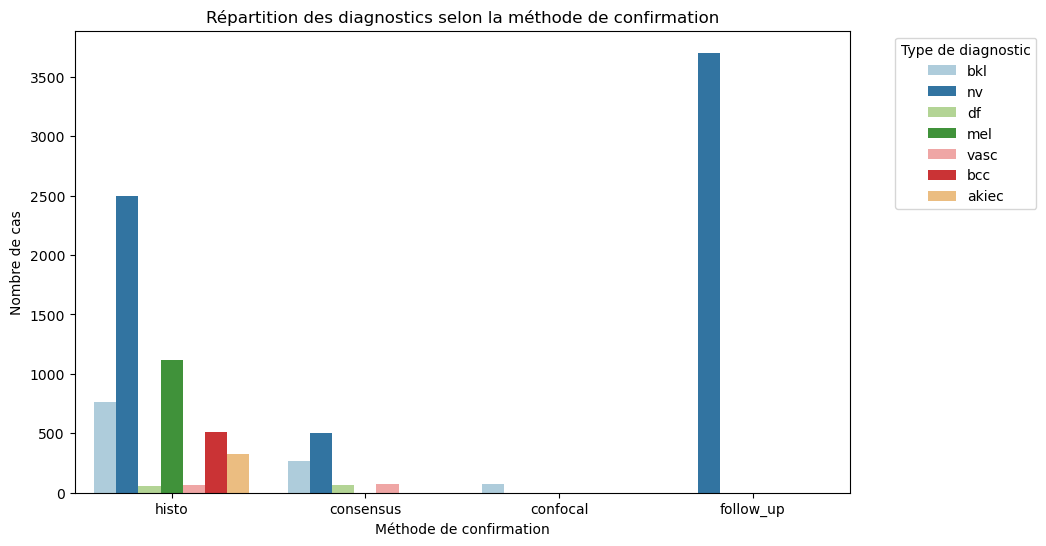

In [78]:
# Répartition des diagnostics par méthode de confirmation (dx_type)
print("\nRépartition des diagnostics par méthode de confirmation :")
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='dx_type', hue='dx', palette='Paired')
plt.title("Répartition des diagnostics selon la méthode de confirmation")
plt.xlabel("Méthode de confirmation")
plt.ylabel("Nombre de cas")
plt.legend(title="Type de diagnostic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### La plupart des diagnostics sont confirmés par histopathologie, suivi de la méthode de consensus d'experts (consensus method). Les autres méthodes (confocal, follow-up, etc.) sont moins fréquentes.
pour le cas du BCC , la methode de confirmation est majoritairement l'histopathologie ce qui est une bonne chose pour nous car c'est une methode visuelle.


Création d'une variable binaire : mélanome (1) vs non-mélanome (0) :

Distribution des âges pour les cas de mélanome vs non-mélanome :


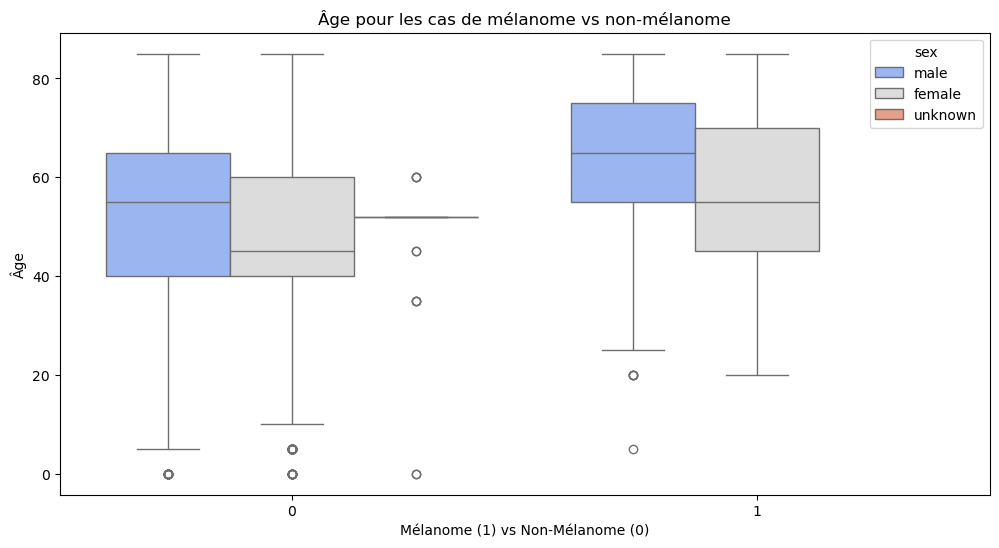

In [85]:
# Influence des colonnes sur le fait d'avoir un cancer (cas binaire : mélanome vs non-mélanome)
print("\nCréation d'une variable binaire : mélanome (1) vs non-mélanome (0) :")
data['is_cancer_mel'] = data['dx'].apply(lambda x: 1 if x == 'mel' else 0)

print("\nDistribution des âges pour les cas de mélanome vs non-mélanome :")
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='is_cancer', y='age', palette='coolwarm', hue='sex')
plt.title("Âge pour les cas de mélanome vs non-mélanome")
plt.xlabel("Mélanome (1) vs Non-Mélanome (0)")
plt.ylabel("Âge")
plt.show()


Création d'une variable binaire : bcc (1) vs non-bcc (0) :

Distribution des âges pour les cas de bcc vs non-bcc :


C:\Users\donfa\AppData\Local\Temp\ipykernel_4360\2090176388.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='is_bcc', y='age', palette='coolwarm')


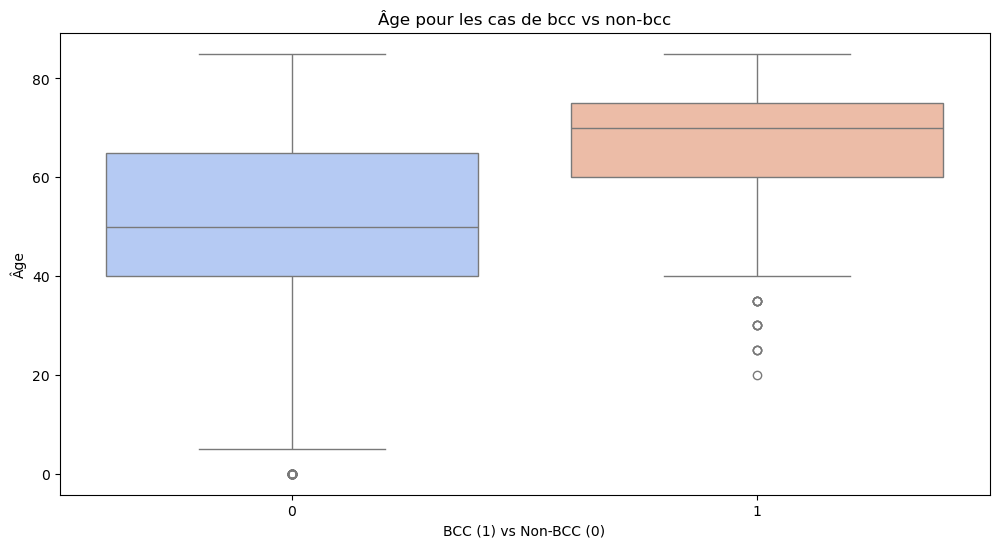

In [86]:
# Influence des colonnes sur le fait d'avoir un cancer (cas binaire : bcc vs non-bcc)
print("\nCréation d'une variable binaire : bcc (1) vs non-bcc (0) :")
data['is_bcc'] = data['dx'].apply(lambda x: 1 if x == 'bcc' else 0)

print("\nDistribution des âges pour les cas de bcc vs non-bcc :")
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='is_bcc', y='age', palette='coolwarm')
plt.title("Âge pour les cas de bcc vs non-bcc")
plt.xlabel("BCC (1) vs Non-BCC (0)")
plt.ylabel("Âge")
plt.show()

#### Les patients atteints de BCC ont tendance à être plus vieux que ceux atteints d'autres types de cancer de la peau. Cela peut être dû au fait que le BCC est plus agressif et touche souvent des personnes plus vieilles.


Corrélations entre sexe et diag :


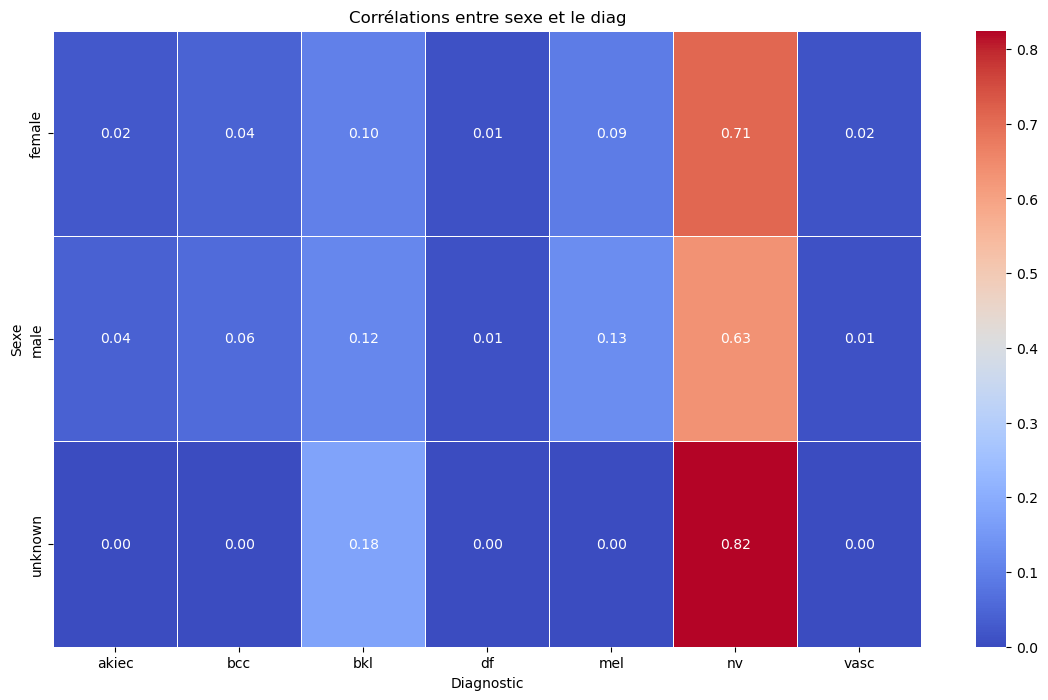

In [83]:
# Analyse des corrélations catégoriques : sexe vs dx
print("\nCorrélations entre sexe et diag :")
plt.figure(figsize=(14, 8))
sns.heatmap(pd.crosstab(data['sex'], data['dx'], normalize='index'), 
            annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Corrélations entre sexe et le diag")
plt.xlabel("Diagnostic")
plt.ylabel("Sexe")
plt.show()

In [84]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,is_cancer,is_bcc
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,0,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,0,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,0,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,0,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,0,0


## Vérification des colonnes les plus influentes (Importance des variables)


Importance des variables pour la prédiction du BCC :


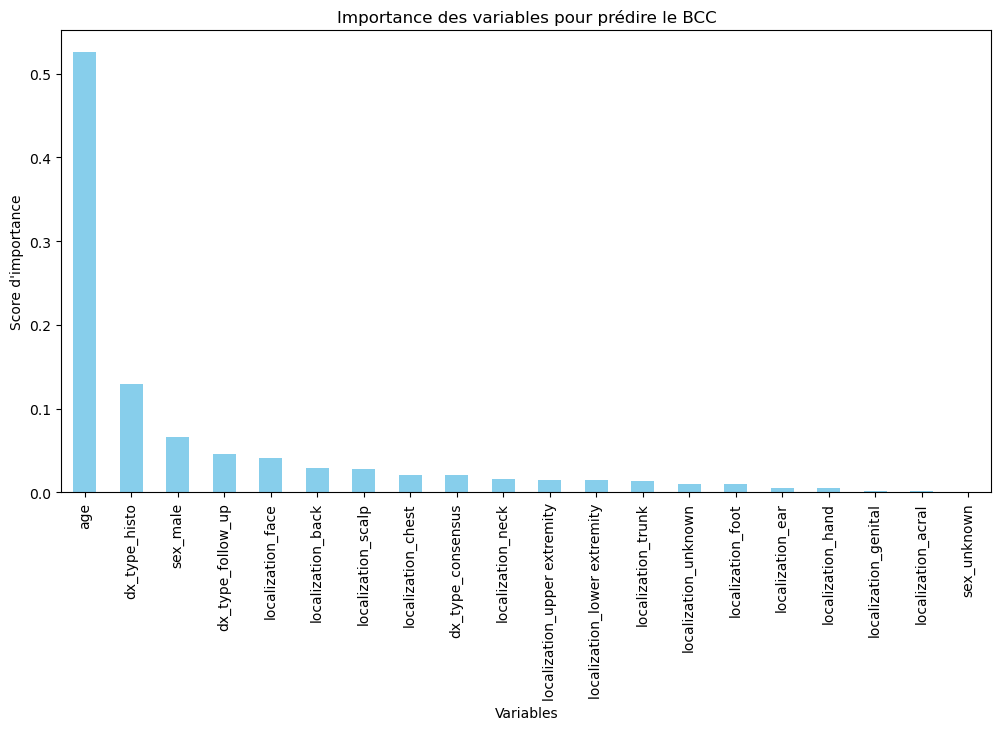

In [91]:
print("\nImportance des variables pour la prédiction du BCC :")
from sklearn.ensemble import RandomForestClassifier

# Préparation des données (imputation simple pour les NaN et encodage des catégories)
encoded_data = pd.get_dummies(data[['age', 'sex', 'localization','dx_type']], drop_first=True)
X = encoded_data
y = data['is_bcc']

# Modèle de forêt aléatoire pour évaluer l'importance des variables
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Affichage de l'importance des variables
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Importance des variables pour prédire le BCC")
plt.ylabel("Score d'importance")
plt.xlabel("Variables")
plt.show()

### L'âge est la variable la plus importante pour prédire le BCC, suivie de la localisation de la lésion. Le sexe a une importance moindre, mais tout de meme presente. on retiendra donc que l'age et la localisation de la lesion sont des facteurs importants pour predire le BCC.


Importance des variables pour la prédiction du MELANOME :


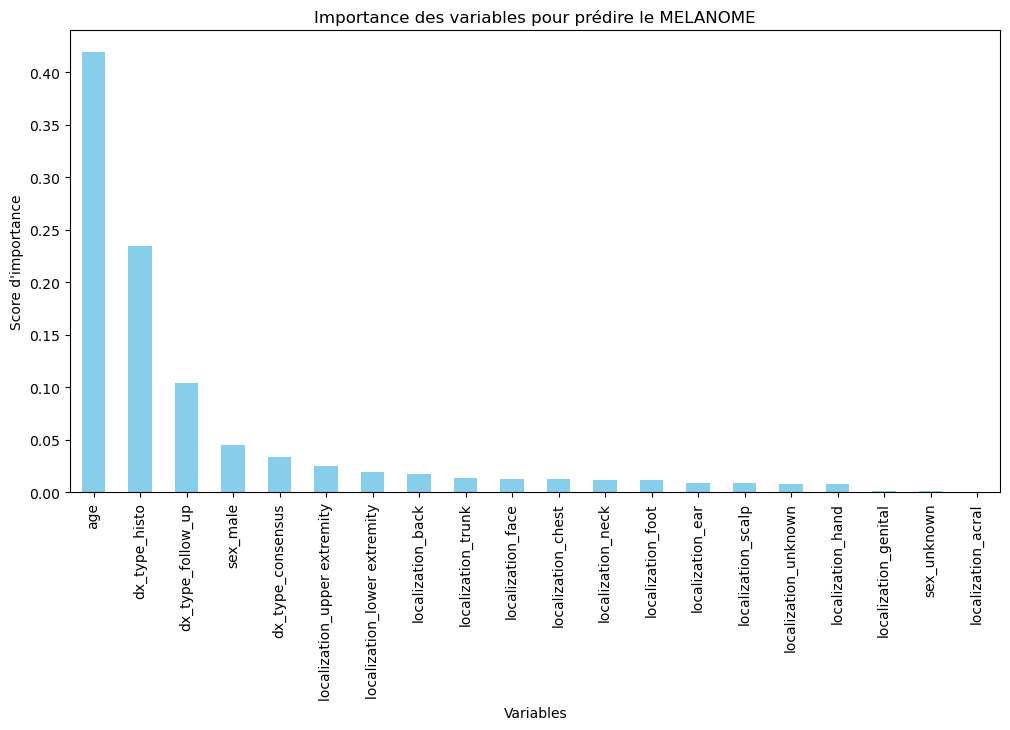

In [92]:
print("\nImportance des variables pour la prédiction du MELANOME :")
from sklearn.ensemble import RandomForestClassifier

# Préparation des données (imputation simple pour les NaN et encodage des catégories)
encoded_data = pd.get_dummies(data[['age', 'sex', 'localization','dx_type']], drop_first=True)
X = encoded_data
y = data['is_cancer_mel']

# Modèle de forêt aléatoire pour évaluer l'importance des variables
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X, y)

# Affichage de l'importance des variables
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Importance des variables pour prédire le MELANOME")
plt.ylabel("Score d'importance")
plt.xlabel("Variables")
plt.show()

### L'âge est la variable la plus importante pour prédire le MELANOME, suivie de la localisation de la lésion. Le sexe a une importance moindre, mais tout de meme presente. on retiendra donc que l'age et la localisation de la lesion sont des facteurs importants pour predire le MELANOME.

## SAUVEGARDE DU DATASET TRAITE

In [ ]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Encodage One-Hot de 'localization'
ohe = OneHotEncoder()
localization_encoded = ohe.fit_transform(data[['localization']]).toarray()  # Conversion en tableau dense
localization_columns = ohe.get_feature_names_out(['localization'])
localization_df = pd.DataFrame(localization_encoded, columns=localization_columns)

# Remplacement dans le DataFrame original
data = pd.concat([data.drop(columns=['localization']), localization_df], axis=1)

# Normalisation de 'age'
scaler = MinMaxScaler()
data['age'] = scaler.fit_transform(data[['age']])

# Réorganisation des colonnes finales
final_columns = ['image_id', 'age'] + list(localization_df.columns) + ['is_cancer', 'is_bcc', 'is_cancer_mel']
df_final = data[final_columns]

# Sauvegarde du dataset final
output_file = "data/processed/Meta_Data_Processed.csv"
df_final.to_csv(output_file, index=False)

print(f"Dataset final enregistré sous {output_file}")

# Affichage des premières lignes
display(df_final.head())

In [103]:
df_final.head()

,image_id,age,localization_abdomen,localization_acral,localization_back,localization_chest,localization_ear,localization_face,localization_foot,localization_genital,localization_hand,localization_lower extremity,localization_neck,localization_scalp,localization_trunk,localization_unknown,localization_upper extremity,is_cancer,is_bcc,is_cancer_mel
0,ISIC_0027419,0.941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
1,ISIC_0025030,0.941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
2,ISIC_0026769,0.941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
3,ISIC_0025661,0.941176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0
4,ISIC_0031633,0.882353,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0


## Le dataset a été nettoyé et prétraité dans l'analyse exploratoire. Les colonnes 'age' et 'localization' ont été encodées, et les valeurs manquantes ont été traitées. Le dataset final a été enregistré sous 'data/processed/Meta_Data_Processed.csv'.

# NOUS AVONS GARDE PARMIS LES META DONNEES LES COLONNES QUI NOUS SEMBLENT LES PLUS IMPORTANTES POUR LA PREDICTION DU BCC ET AUTRES CANCERS DE LA PEAU.